# LAb5: Generalização de modelos lineares

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Ana Sofia Preto Oliveira   
## Número: 39275

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab5.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

# Dados: $\texttt{breast_cancer}$ dataset do $\texttt{sklearn}$
### Considere os dados do $\texttt{breast_cancer}$ dataset do $\texttt{sklearn}$, divididos em três conjuntos, treino/validação/teste, segundo os comandos da próxima célula.
* ### X1a: dados de treino (array de $319\times30$)
* ### y1a: classe do dados de treino
* ### X1b: dados de validação (array de $100\times30$)
* ### y1b: classe do dados de validação
* ### X2: dados de treino (array de $150\times30$)
* ### y2: classe do dados de teste

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import  train_test_split
import sklearn.datasets as DT
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

D=DT.load_breast_cancer()
X=D.data
y=D.target

################################################################
#ATENÇÃO: Considerar os casos malígnos como positivos (classe 1)
#Necessário inverter classes
y=np.abs(y-1)
################################################################

#divitir em treino, validação e teste
X1,X2,y1,y2=train_test_split(X,y,test_size=150,stratify=y,random_state=42)
X1a,X1b,y1a,y1b=train_test_split(X1,y1,test_size=100,stratify=y1,random_state=42)

# Pergunta 1: Discriminantes logístico
##  Considere um discriminante logístico com regularização $\ell\_1$ (lasso) e com os parâmetros $\texttt{C=2}$, $\texttt{solver='saga'}$ e $\texttt{max\_iter=5000}$. Treine o classificador com os conjuntos de treino e validação (419 exemplos).
### a) Imprima o número total de erros e matriz de confusão (não normalizada) deste classificador para o conjunto de teste.
### b) Imprima o índice e os nomes (feature names) das dimensões dos dados que não interferem no processo de classificação (dimensões descartadas).
### c) Calibre este classificador de maneira a ter um número máximo de falsos negativos no teste inferior o igual a 5, e ao mesmo tempo mantendo o número total de erros igual à da alínea 1.a).
### d) Faça um plot da curva ROC deste classificador com os dados de teste. Inclua nesse plot o ponto operacional dos classificadores da alínea 1.a) e 1.c).

## 1.a)

In [159]:
treino_validacao = np.vstack((X1a, X1b))
y_treino_validacao = np.hstack((y1a, y1b))

# print(treino_validacao.shape, y_treino_validacao.shape)

# penalty=Lasso (l1), C=2, solver='saga', max_iter=5000
lr = LogisticRegression(penalty='l1', C=2, solver='saga', max_iter=5000).fit(treino_validacao, y_treino_validacao)
y2e = lr.predict(X2)

CM = confusion_matrix(y2, y2e)

true_positive = CM[1][1]
true_negative = CM[0][0]
false_positive = CM[0][1]
false_negative = CM[1][0]

# print("true_positive {}".format(true_positive))
# print("true_negative {}".format(true_negative))
# print("false_positive {}".format(false_positive))
# print("false_negative {}".format(false_negative))

true_pos_rate_1 = true_positive/(true_positive+false_negative)
false_pos_rate_1 = false_positive/(false_positive+true_negative)

print("Número de erros: {}".format(np.sum(y2 != y2e)))
print("Matriz de confusão: \n{}".format(CM))

Número de erros: 12
Matriz de confusão: 
[[93  1]
 [11 45]]


## 1.b)

In [153]:
features_names = D.feature_names

w = lr.coef_.squeeze()

print("Indices das features descartadas:", np.argwhere(w==0).squeeze())
print("Features descartadas: ", features_names[w==0])


Indices das features descartadas: [ 4  9 10 14 15 16 17 18 19 24 29]
Features descartadas:  ['mean smoothness' 'mean fractal dimension' 'radius error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst smoothness' 'worst fractal dimension']


## 1.c)

In [160]:
lr2 = LogisticRegression(penalty='l1', C=10, solver='liblinear', max_iter=5000).fit(treino_validacao, y_treino_validacao.T)
y2e = lr2.predict(X2)

CM = confusion_matrix(y2, y2e)

true_positive = CM[1][1]
true_negative = CM[0][0]
false_positive = CM[0][1]
false_negative = CM[1][0]

# print("true_positive {}".format(true_positive))
# print("true_negative {}".format(true_negative))
# print("false_positive {}".format(false_positive))
# print("false_negative {}".format(false_negative))

true_pos_rate_2 = true_positive/(true_positive+false_negative)
false_pos_rate_2 = false_positive/(false_positive+true_negative)

print("Número de erros: {}".format(np.sum(y2 != y2e)))
print("Matriz de confusão: \n{}".format(CM))



Número de erros: 7
Matriz de confusão: 
[[92  2]
 [ 5 51]]


## 1.d)

(-0.05, 1.05, -0.05, 1.05)

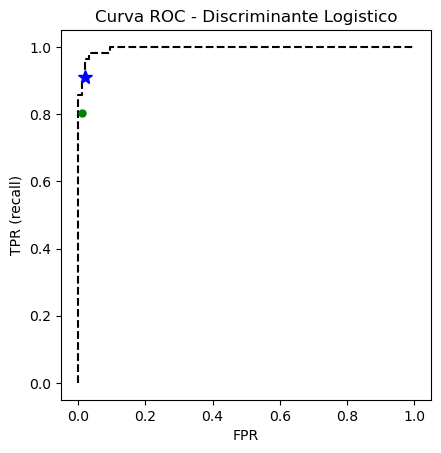

In [161]:
fpr, tpr, thresholds = roc_curve(y2, lr2.predict_proba(X2)[:, 1])

plt.figure()
plt.title("Curva ROC - Discriminante Logistico")
plt.plot(fpr, tpr, '--k')
plt.plot(false_pos_rate_1, true_pos_rate_1, '.g', ms=10)
plt.plot(false_pos_rate_2, true_pos_rate_2, '*b', ms=10)
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.axis("scaled")


<hr style="border:2px solid black"> </hr>

# Pergunta 2 - SVMs:
## Considere o classificador da função $\texttt{SVC}$ com os parâmetros $\texttt{kernel='rbf'}$ e $\texttt{C=2}$.
### a) Faça um pré-processamento dos dados usando a função $\texttt{StandardScaler}$. Treine esta função com os dados treino e aplique a transformação aos três conjuntos (treino, validação e teste). Use os dados pré-processados nas alíneas seguintes.
### b) Pertende-se estimar o valor do parâmetro $\texttt{gamma}$  ($\gamma$) mais adequado para este problema. Para tal, use o conjunto de validação para achar o valor de $\gamma$ que resulta no menor número de erros (treine o $\texttt{SVC}$ com o conjunto de treino). Teste os seguintes valores de $\gamma$: $[0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175]$.
### c) Volte a treinar o classificador $\texttt{SVC}$ com os dados de treino e validação, e com o melhor valor de $\gamma$. Faça um plot da curva ROC deste classificador com os dados de teste. Inclua nesse plot o ponto operacional do classificadore. 
### d)  Calibre o classificador da alínea anterior de modo a obter zero (0) falsos negativos nos dados de teste. Após a calibração qual o número mínimo de falso positivos obtidos no teste?

## 2.a)

In [162]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X1a)
X1a_n = sc.transform(X1a)
X1b_n = sc.transform(X1b)
X2_n = sc.transform(X2)

## 2.b)

In [191]:
from sklearn.model_selection import GridSearchCV

svm=SVC(kernel='rbf',C=2)
# Gamma=np.arange(0.0050,0.02,0.0025)

gamma = [0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175]

param_grid = {'gamma': gamma}
grid = GridSearchCV(svm, param_grid, cv=3).fit(X1a_n, y1a)
print("Best estimator: ", grid.best_estimator_)


y1b_e = grid.best_estimator_.predict(X1b_n)
print("Número de erros: ", np.sum(y1b != y1b_e))
CM = confusion_matrix(y1b, y1b_e)

true_positive = CM[1][1]
true_negative = CM[0][0]
false_positive = CM[0][1]
false_negative = CM[1][0]

true_pos_rate = true_positive/(true_positive+false_negative)
false_pos_rate = false_positive/(false_positive+true_negative)



Best estimator:  SVC(C=2, gamma=0.01)
Número de erros:  1


## 2.c)

(-0.05, 1.05, -0.05, 1.05)

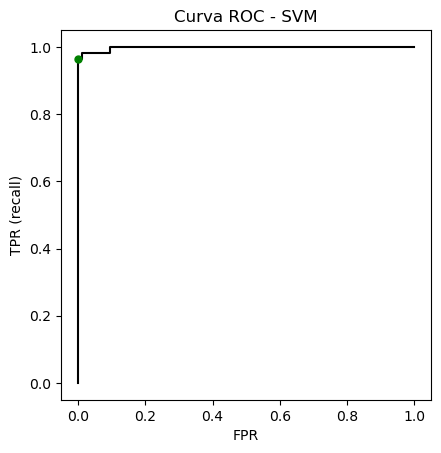

In [204]:

dados_treino_validacao = np.vstack((X1a_n, X1b_n))
y_treino_validacao = np.hstack((y1a, y1b))

svm=SVC(kernel='rbf', C=2, gamma=0.01, probability=True).fit(dados_treino_validacao, y_treino_validacao)
y2_e = svm.predict(X2_n)

CM = confusion_matrix(y2, y2_e)
                               
true_positive = CM[1][1]
true_negative = CM[0][0]
false_positive = CM[0][1]
false_negative = CM[1][0]

# print("CM \n", CM)
# print("true_positive {}".format(true_positive))
# print("true_negative {}".format(true_negative))
# print("false_positive {}".format(false_positive))
# print("false_negative {}".format(false_negative))

true_pos_rate = true_positive/(true_positive+false_negative)
false_pos_rate = false_positive/(false_positive+true_negative)                               
                               
fpr, tpr, thresholds = roc_curve(y2, svm.predict_proba(X2_n)[:, 1])

plt.figure()
plt.title("Curva ROC - SVM")
plt.plot(fpr, tpr, '-k')
plt.plot(false_pos_rate, true_pos_rate, '.g', ms=10)
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.axis("scaled")

## 2.d)

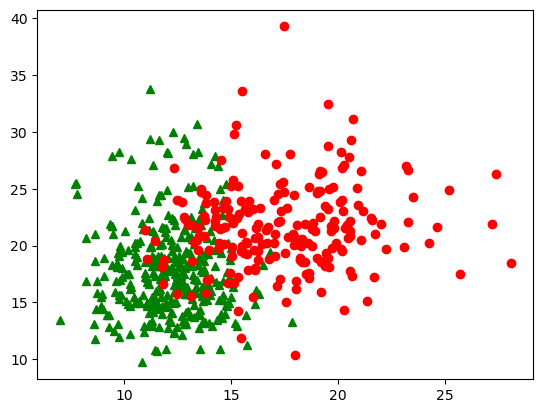

In [236]:
plt.plot(X[y==0, 0], X[y==0, 1], '^g')
plt.plot(X[y==1, 0], X[y==1, 1], 'or')

In [286]:
dados_treino_validacao = np.vstack((X1a_n, X1b_n))
y_treino_validacao = np.hstack((y1a, y1b))

svm=SVC(C=1, coef0=2000, gamma=0.001, kernel='poly', degree=2).fit(dados_treino_validacao, y_treino_validacao)
y2_e = svm.predict(X2_n)
CM = confusion_matrix(y2, y2_e)
true_positive = CM[1][1]
true_negative = CM[0][0]
false_positive = CM[0][1]
false_negative = CM[1][0]

print("Matriz de confusão: \n", CM)
# print("true_positive {}".format(true_positive))
# print("true_negative {}".format(true_negative))
# print("false_positive {}".format(false_positive))
# print("false_negative {}".format(false_negative))

Matriz de confusão: 
 [[94  0]
 [ 5 51]]
